In [ ]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando o conjunto de dados
base_2018 = "https://raw.githubusercontent.com/arnaldorosentino/Data_ONS/main/BALANCO_ENERGIA_SUBSISTEMA_2018.csv"
base_2019 = "https://raw.githubusercontent.com/arnaldorosentino/Data_ONS/main/BALANCO_ENERGIA_SUBSISTEMA_2019.csv"
base_2020 = "https://raw.githubusercontent.com/arnaldorosentino/Data_ONS/main/BALANCO_ENERGIA_SUBSISTEMA_2020.csv"
base_2021 = "https://raw.githubusercontent.com/arnaldorosentino/Data_ONS/main/BALANCO_ENERGIA_SUBSISTEMA_2021.csv"
base_2022 = "https://raw.githubusercontent.com/arnaldorosentino/Data_ONS/main/BALANCO_ENERGIA_SUBSISTEMA_2022.csv"

In [ ]:
df_ONS_2018 = pd.read_csv(
    base_2018,
    sep = ';',
    )

df_ONS_2019 = pd.read_csv(
    base_2019,
    sep = ';',
)

df_ONS_2020 = pd.read_csv(
    base_2020,
    sep = ';',
)

df_ONS_2021 = pd.read_csv(
    base_2021,
    sep = ';',
)

df_ONS_2022 = pd.read_csv(
    base_2022,
    sep = ';',
)

In [ ]:
df_ONS_2022.shape

(43800, 9)

In [ ]:
# Combinando os dataframes usando a função concat()
dfs = [df_ONS_2018, df_ONS_2019, df_ONS_2020, df_ONS_2021, df_ONS_2022]
df_ONS = pd.concat(dfs)

# Filtrando somente Geração do SIN
df_SIN = df_ONS.query('id_subsistena=="SIN"')

In [ ]:
df_SIN.shape

(43823, 9)

In [ ]:
df_SIN.head()

,id_subsistena,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
2,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 00:00:00,36148.183,12054.065,4970.411,0.0,53172.66,0.0
7,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 01:00:00,35727.952,11991.927,5002.853,0.0,52722.73,0.0
12,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 02:00:00,35296.626,11924.979,4985.455,0.0,52207.06,0.0
17,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 03:00:00,34811.264,11720.099,4729.583,0.0,51260.95,0.0
22,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 04:00:00,34777.921,11634.889,4060.582,0.0,50473.39,0.0


In [ ]:
df_SIN.tail()

,id_subsistena,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio
43777,SIN,SISTEMA INTERLIGADO NACIONAL,2022-12-31 19:00:00,58820.435,5684.718,12962.954,22.401,77131.56,358.95
43782,SIN,SISTEMA INTERLIGADO NACIONAL,2022-12-31 20:00:00,56590.560,5713.314,13862.322,21.678,75828.87,359.01
43787,SIN,SISTEMA INTERLIGADO NACIONAL,2022-12-31 21:00:00,50380.035,5698.810,14157.347,21.256,69898.48,358.97
43792,SIN,SISTEMA INTERLIGADO NACIONAL,2022-12-31 22:00:00,45208.426,5691.750,14194.134,20.320,64615.88,498.75
43797,SIN,SISTEMA INTERLIGADO NACIONAL,2022-12-31 23:00:00,41689.304,5676.925,14304.310,19.434,61218.90,471.08


In [ ]:
# Criando variável total renovaveis
df_SIN['renovaveis'] = df_SIN['val_gereolica'] + df_SIN['val_gersolar']
df_SIN.shape

<ipython-input-62-02ed3259dc7c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SIN['renovaveis'] = df_SIN['val_gereolica'] + df_SIN['val_gersolar']


(43823, 10)

In [ ]:
# Transformando o atributo "din_instante" em datetime
df_SIN['din_instante'] = pd.to_datetime(df_SIN['din_instante'], infer_datetime_format = True)

<ipython-input-63-f0de9cabdd97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SIN['din_instante'] = pd.to_datetime(df_SIN['din_instante'], infer_datetime_format = True)


In [ ]:
# Criando a variável ano
df_SIN['ano'] = df_SIN['din_instante'].dt.year
df_SIN.head()

<ipython-input-64-c6f2cccff863>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SIN['ano'] = df_SIN['din_instante'].dt.year


,id_subsistena,nom_subsistema,din_instante,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio,renovaveis,ano
2,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 00:00:00,36148.183,12054.065,4970.411,0.0,53172.66,0.0,4970.411,2018
7,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 01:00:00,35727.952,11991.927,5002.853,0.0,52722.73,0.0,5002.853,2018
12,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 02:00:00,35296.626,11924.979,4985.455,0.0,52207.06,0.0,4985.455,2018
17,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 03:00:00,34811.264,11720.099,4729.583,0.0,51260.95,0.0,4729.583,2018
22,SIN,SISTEMA INTERLIGADO NACIONAL,2018-01-01 04:00:00,34777.921,11634.889,4060.582,0.0,50473.39,0.0,4060.582,2018


In [ ]:
# Obterndo Dataset de geração térmica e renováveis por ano
df = df_SIN[['ano','val_gertermica','renovaveis']]\
  .groupby('ano', as_index = False)\
  .sum()
# Espiando
df

,ano,val_gertermica,renovaveis
0,2018,9.606110e+07,4.846730e+07
1,2019,9.756874e+07,5.777434e+07
2,2020,9.021669e+07,5.953546e+07
3,2021,1.419148e+08,7.960512e+07
4,2022,7.634584e+07,9.330385e+07


In [ ]:
# Converter a coluna "year" em um tipo de dados categórico
df['ano'] = df['ano'].astype('category')

In [ ]:
print(df['ano'].dtype)

category


In [ ]:
alt.Chart(data = df)\
  .mark_circle(size=200)\
  .encode(
    alt.X('renovaveis',scale=alt.Scale(zero=False)),
    alt.Y('val_gertermica',scale=alt.Scale(zero=False, padding=1)),
    color = alt.Color("ano", scale=alt.Scale(scheme="category20")),
    tooltip = ['ano', 'val_gertermica', 'renovaveis']
).properties(width=600, height=400).interactive()

alt.Chart(...)

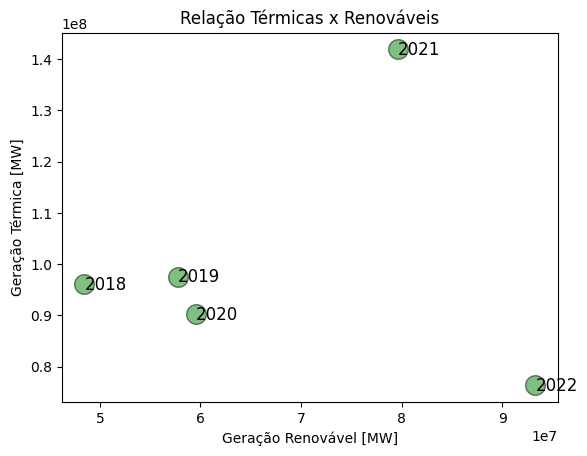

In [ ]:
# Dados de exemplo
x = df['renovaveis']
y = df['val_gertermica']
year = df['ano']

# Cria um gráfico de dispersão com marcação de círculos
plt.scatter(x, y, marker='o', s=200, c='g', edgecolors='k', alpha=0.5)

# Adiciona as anotações dos anos para cada ponto
for i, txt in enumerate(year):
     plt.annotate(txt, (x[i], y[i]), va='center', fontsize=12)

# Adiciona os rótulos dos eixos x e y
plt.xlabel('Geração Renovável [MW]')
plt.ylabel('Geração Térmica [MW]')

# Adiciona um título
plt.title('Relação Térmicas x Renováveis')

# Exibe o gráfico
plt.show()

In [ ]:
# Define a coluna datetime como índice do dataframe
df_SIN = df_SIN.set_index('din_instante')

In [ ]:
df_SIN

,id_subsistena,nom_subsistema,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio,renovaveis,ano
din_instante,,,,,,,,,,
2018-01-01 00:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,36148.183,12054.065,4970.411,0.000,53172.66,0.00,4970.411,2018
2018-01-01 01:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,35727.952,11991.927,5002.853,0.000,52722.73,0.00,5002.853,2018
2018-01-01 02:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,35296.626,11924.979,4985.455,0.000,52207.06,0.00,4985.455,2018
2018-01-01 03:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,34811.264,11720.099,4729.583,0.000,51260.95,0.00,4729.583,2018
2018-01-01 04:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,34777.921,11634.889,4060.582,0.000,50473.39,0.00,4060.582,2018
...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,58820.435,5684.718,12962.954,22.401,77131.56,358.95,12985.355,2022
2022-12-31 20:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,56590.560,5713.314,13862.322,21.678,75828.87,359.01,13884.000,2022
2022-12-31 21:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,50380.035,5698.810,14157.347,21.256,69898.48,358.97,14178.603,2022


In [ ]:
# Extrai o nome do dia da semana a partir do índice
df_SIN['dia_da_semana'] = df_SIN.index.strftime('%A')
df_SIN

,id_subsistena,nom_subsistema,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,val_intercambio,renovaveis,ano,dia_da_semana
din_instante,,,,,,,,,,,
2018-01-01 00:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,36148.183,12054.065,4970.411,0.000,53172.66,0.00,4970.411,2018,Monday
2018-01-01 01:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,35727.952,11991.927,5002.853,0.000,52722.73,0.00,5002.853,2018,Monday
2018-01-01 02:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,35296.626,11924.979,4985.455,0.000,52207.06,0.00,4985.455,2018,Monday
2018-01-01 03:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,34811.264,11720.099,4729.583,0.000,51260.95,0.00,4729.583,2018,Monday
2018-01-01 04:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,34777.921,11634.889,4060.582,0.000,50473.39,0.00,4060.582,2018,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,58820.435,5684.718,12962.954,22.401,77131.56,358.95,12985.355,2022,Saturday
2022-12-31 20:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,56590.560,5713.314,13862.322,21.678,75828.87,359.01,13884.000,2022,Saturday
2022-12-31 21:00:00,SIN,SISTEMA INTERLIGADO NACIONAL,50380.035,5698.810,14157.347,21.256,69898.48,358.97,14178.603,2022,Saturday


In [ ]:
# Seleciona apenas os dados correspondentes a um determinado dia da semana - Ano 2018
monday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Monday') & (df_SIN['ano'] == 2018)]
tuesday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Tuesday') & (df_SIN['ano'] == 2018)]
wednesday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Wednesday') & (df_SIN['ano'] == 2018)]
thursday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Thursday') & (df_SIN['ano'] == 2018)]
friday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Friday') & (df_SIN['ano'] == 2018)]
saturday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Saturday') & (df_SIN['ano'] == 2018)]
sunday_data_2018 = df_SIN[(df_SIN['dia_da_semana'] == 'Sunday') & (df_SIN['ano'] == 2018)]

# Seleciona apenas os dados correspondentes a um determinado dia da semana - Ano 2019
monday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Monday') & (df_SIN['ano'] == 2019)]
tuesday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Tuesday') & (df_SIN['ano'] == 2019)]
wednesday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Wednesday') & (df_SIN['ano'] == 2019)]
thursday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Thursday') & (df_SIN['ano'] == 2019)]
friday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Friday') & (df_SIN['ano'] == 2019)]
saturday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Saturday') & (df_SIN['ano'] == 2019)]
sunday_data_2019 = df_SIN[(df_SIN['dia_da_semana'] == 'Sunday') & (df_SIN['ano'] == 2019)]

# Seleciona apenas os dados correspondentes a um determinado dia da semana - Ano 2020
monday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Monday') & (df_SIN['ano'] == 2020)]
tuesday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Tuesday') & (df_SIN['ano'] == 2020)]
wednesday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Wednesday') & (df_SIN['ano'] == 2020)]
thursday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Thursday') & (df_SIN['ano'] == 2020)]
friday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Friday') & (df_SIN['ano'] == 2020)]
saturday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Saturday') & (df_SIN['ano'] == 2020)]
sunday_data_2020 = df_SIN[(df_SIN['dia_da_semana'] == 'Sunday') & (df_SIN['ano'] == 2020)]

# Seleciona apenas os dados correspondentes a um determinado dia da semana - Ano 2021
monday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Monday') & (df_SIN['ano'] == 2021)]
tuesday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Tuesday') & (df_SIN['ano'] == 2021)]
wednesday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Wednesday') & (df_SIN['ano'] == 2021)]
thursday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Thursday') & (df_SIN['ano'] == 2021)]
friday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Friday') & (df_SIN['ano'] == 2021)]
saturday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Saturday') & (df_SIN['ano'] == 2021)]
sunday_data_2021 = df_SIN[(df_SIN['dia_da_semana'] == 'Sunday') & (df_SIN['ano'] == 2021)]

# Seleciona apenas os dados correspondentes a um determinado dia da semana - Ano 2022
monday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Monday') & (df_SIN['ano'] == 2022)]
tuesday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Tuesday') & (df_SIN['ano'] == 2022)]
wednesday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Wednesday') & (df_SIN['ano'] == 2022)]
thursday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Thursday') & (df_SIN['ano'] == 2022)]
friday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Friday') & (df_SIN['ano'] == 2022)]
saturday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Saturday') & (df_SIN['ano'] == 2022)]
sunday_data_2022 = df_SIN[(df_SIN['dia_da_semana'] == 'Sunday') & (df_SIN['ano'] == 2022)]

In [ ]:
# Agrupa os dados por hora do dia - Ano 2018
hourly_groups_Mo_2018 = monday_data_2018.groupby(monday_data_2018.index.hour)
hourly_groups_Tu_2018 = tuesday_data_2018.groupby(tuesday_data_2018.index.hour)
hourly_groups_Wd_2018 = wednesday_data_2018.groupby(wednesday_data_2018.index.hour)
hourly_groups_Th_2018 = thursday_data_2018.groupby(thursday_data_2018.index.hour)
hourly_groups_Fr_2018 = friday_data_2018.groupby(friday_data_2018.index.hour)
hourly_groups_St_2018 = saturday_data_2018.groupby(saturday_data_2018.index.hour)
hourly_groups_Su_2018 = sunday_data_2018.groupby(sunday_data_2018.index.hour)

# Agrupa os dados por hora do dia - Ano 2019
hourly_groups_Mo_2019 = monday_data_2019.groupby(monday_data_2019.index.hour)
hourly_groups_Tu_2019 = tuesday_data_2019.groupby(tuesday_data_2019.index.hour)
hourly_groups_Wd_2019 = wednesday_data_2019.groupby(wednesday_data_2019.index.hour)
hourly_groups_Th_2019 = thursday_data_2019.groupby(thursday_data_2019.index.hour)
hourly_groups_Fr_2019 = friday_data_2019.groupby(friday_data_2019.index.hour)
hourly_groups_St_2019 = saturday_data_2019.groupby(saturday_data_2019.index.hour)
hourly_groups_Su_2019 = sunday_data_2019.groupby(sunday_data_2019.index.hour)

# Agrupa os dados por hora do dia - Ano 2020
hourly_groups_Mo_2020 = monday_data_2020.groupby(monday_data_2020.index.hour)
hourly_groups_Tu_2020 = tuesday_data_2020.groupby(tuesday_data_2020.index.hour)
hourly_groups_Wd_2020 = wednesday_data_2020.groupby(wednesday_data_2020.index.hour)
hourly_groups_Th_2020 = thursday_data_2020.groupby(thursday_data_2020.index.hour)
hourly_groups_Fr_2020 = friday_data_2020.groupby(friday_data_2020.index.hour)
hourly_groups_St_2020 = saturday_data_2020.groupby(saturday_data_2020.index.hour)
hourly_groups_Su_2020 = sunday_data_2020.groupby(sunday_data_2020.index.hour)

# Agrupa os dados por hora do dia - Ano 2021
hourly_groups_Mo_2021 = monday_data_2021.groupby(monday_data_2021.index.hour)
hourly_groups_Tu_2021 = tuesday_data_2021.groupby(tuesday_data_2021.index.hour)
hourly_groups_Wd_2021 = wednesday_data_2021.groupby(wednesday_data_2021.index.hour)
hourly_groups_Th_2021 = thursday_data_2021.groupby(thursday_data_2021.index.hour)
hourly_groups_Fr_2021 = friday_data_2021.groupby(friday_data_2021.index.hour)
hourly_groups_St_2021 = saturday_data_2021.groupby(saturday_data_2021.index.hour)
hourly_groups_Su_2021 = sunday_data_2021.groupby(sunday_data_2021.index.hour)

# Agrupa os dados por hora do dia - Ano 2022
hourly_groups_Mo_2022 = monday_data_2022.groupby(monday_data_2022.index.hour)
hourly_groups_Tu_2022 = tuesday_data_2022.groupby(tuesday_data_2022.index.hour)
hourly_groups_Wd_2022 = wednesday_data_2022.groupby(wednesday_data_2022.index.hour)
hourly_groups_Th_2022 = thursday_data_2022.groupby(thursday_data_2022.index.hour)
hourly_groups_Fr_2022 = friday_data_2022.groupby(friday_data_2022.index.hour)
hourly_groups_St_2022 = saturday_data_2022.groupby(saturday_data_2022.index.hour)
hourly_groups_Su_2022 = sunday_data_2022.groupby(sunday_data_2022.index.hour)

In [ ]:
# Calcula a média para cada hora do dia - Ano 2018
hourly_means_Mo_2018 = hourly_groups_Mo_2018.mean(numeric_only=True)
hourly_means_Tu_2018 = hourly_groups_Tu_2018.mean(numeric_only=True)
hourly_means_Wd_2018 = hourly_groups_Wd_2018.mean(numeric_only=True)
hourly_means_Th_2018 = hourly_groups_Th_2018.mean(numeric_only=True)
hourly_means_Fr_2018 = hourly_groups_Fr_2018.mean(numeric_only=True)
hourly_means_St_2018 = hourly_groups_St_2018.mean(numeric_only=True)
hourly_means_Su_2018 = hourly_groups_Su_2018.mean(numeric_only=True)

# Calcula a média para cada hora do dia - Ano 2019
hourly_means_Mo_2019 = hourly_groups_Mo_2019.mean(numeric_only=True)
hourly_means_Tu_2019 = hourly_groups_Tu_2019.mean(numeric_only=True)
hourly_means_Wd_2019 = hourly_groups_Wd_2019.mean(numeric_only=True)
hourly_means_Th_2019 = hourly_groups_Th_2019.mean(numeric_only=True)
hourly_means_Fr_2019 = hourly_groups_Fr_2019.mean(numeric_only=True)
hourly_means_St_2019 = hourly_groups_St_2019.mean(numeric_only=True)
hourly_means_Su_2019 = hourly_groups_Su_2019.mean(numeric_only=True)

# Calcula a média para cada hora do dia - Ano 2020
hourly_means_Mo_2020 = hourly_groups_Mo_2020.mean(numeric_only=True)
hourly_means_Tu_2020 = hourly_groups_Tu_2020.mean(numeric_only=True)
hourly_means_Wd_2020 = hourly_groups_Wd_2020.mean(numeric_only=True)
hourly_means_Th_2020 = hourly_groups_Th_2020.mean(numeric_only=True)
hourly_means_Fr_2020 = hourly_groups_Fr_2020.mean(numeric_only=True)
hourly_means_St_2020 = hourly_groups_St_2020.mean(numeric_only=True)
hourly_means_Su_2020 = hourly_groups_Su_2020.mean(numeric_only=True)

# Calcula a média para cada hora do dia - Ano 2021
hourly_means_Mo_2021 = hourly_groups_Mo_2021.mean(numeric_only=True)
hourly_means_Tu_2021 = hourly_groups_Tu_2021.mean(numeric_only=True)
hourly_means_Wd_2021 = hourly_groups_Wd_2021.mean(numeric_only=True)
hourly_means_Th_2021 = hourly_groups_Th_2021.mean(numeric_only=True)
hourly_means_Fr_2021 = hourly_groups_Fr_2021.mean(numeric_only=True)
hourly_means_St_2021 = hourly_groups_St_2021.mean(numeric_only=True)
hourly_means_Su_2021 = hourly_groups_Su_2021.mean(numeric_only=True)

# Calcula a média para cada hora do dia - Ano 2022
hourly_means_Mo_2022 = hourly_groups_Mo_2022.mean(numeric_only=True)
hourly_means_Tu_2022 = hourly_groups_Tu_2022.mean(numeric_only=True)
hourly_means_Wd_2022 = hourly_groups_Wd_2022.mean(numeric_only=True)
hourly_means_Th_2022 = hourly_groups_Th_2022.mean(numeric_only=True)
hourly_means_Fr_2022 = hourly_groups_Fr_2022.mean(numeric_only=True)
hourly_means_St_2022 = hourly_groups_St_2022.mean(numeric_only=True)
hourly_means_Su_2022 = hourly_groups_Su_2022.mean(numeric_only=True)

<ipython-input-75-a560af89e843>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_means_Mo_2018 = hourly_groups_Mo_2018.mean()
<ipython-input-75-a560af89e843>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_means_Tu_2018 = hourly_groups_Tu_2018.mean()
<ipython-input-75-a560af89e843>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_means_Wd_2018 = hourly_groups_Wd_2018.mean()
<ipython-input-75-a560

In [ ]:
# Cria uma coluna com o nome do dia da semana - Ano 2018
hourly_means_Mo_2018 = hourly_means_Mo_2018.assign(Dia_da_Semana='Segunda')
hourly_means_Tu_2018 = hourly_means_Tu_2018.assign(Dia_da_Semana='Terça')
hourly_means_Wd_2018 = hourly_means_Wd_2018.assign(Dia_da_Semana='Quarta')
hourly_means_Th_2018 = hourly_means_Th_2018.assign(Dia_da_Semana='Quinta')
hourly_means_Fr_2018 = hourly_means_Fr_2018.assign(Dia_da_Semana='Sexta')
hourly_means_St_2018 = hourly_means_St_2018.assign(Dia_da_Semana='Sábado')
hourly_means_Su_2018 = hourly_means_Su_2018.assign(Dia_da_Semana='Domingo')

# Cria uma coluna com o nome do dia da semana - Ano 2019
hourly_means_Mo_2019 = hourly_means_Mo_2019.assign(Dia_da_Semana='Segunda')
hourly_means_Tu_2019 = hourly_means_Tu_2019.assign(Dia_da_Semana='Terça')
hourly_means_Wd_2019 = hourly_means_Wd_2019.assign(Dia_da_Semana='Quarta')
hourly_means_Th_2019 = hourly_means_Th_2019.assign(Dia_da_Semana='Quinta')
hourly_means_Fr_2019 = hourly_means_Fr_2019.assign(Dia_da_Semana='Sexta')
hourly_means_St_2019 = hourly_means_St_2019.assign(Dia_da_Semana='Sábado')
hourly_means_Su_2019 = hourly_means_Su_2019.assign(Dia_da_Semana='Domingo')

# Cria uma coluna com o nome do dia da semana - Ano 2020
hourly_means_Mo_2020 = hourly_means_Mo_2020.assign(Dia_da_Semana='Segunda')
hourly_means_Tu_2020 = hourly_means_Tu_2020.assign(Dia_da_Semana='Terça')
hourly_means_Wd_2020 = hourly_means_Wd_2020.assign(Dia_da_Semana='Quarta')
hourly_means_Th_2020 = hourly_means_Th_2020.assign(Dia_da_Semana='Quinta')
hourly_means_Fr_2020 = hourly_means_Fr_2020.assign(Dia_da_Semana='Sexta')
hourly_means_St_2020 = hourly_means_St_2020.assign(Dia_da_Semana='Sábado')
hourly_means_Su_2020 = hourly_means_Su_2020.assign(Dia_da_Semana='Domingo')

# Cria uma coluna com o nome do dia da semana - Ano 2021
hourly_means_Mo_2021 = hourly_means_Mo_2021.assign(Dia_da_Semana='Segunda')
hourly_means_Tu_2021 = hourly_means_Tu_2021.assign(Dia_da_Semana='Terça')
hourly_means_Wd_2021 = hourly_means_Wd_2021.assign(Dia_da_Semana='Quarta')
hourly_means_Th_2021 = hourly_means_Th_2021.assign(Dia_da_Semana='Quinta')
hourly_means_Fr_2021 = hourly_means_Fr_2021.assign(Dia_da_Semana='Sexta')
hourly_means_St_2021 = hourly_means_St_2021.assign(Dia_da_Semana='Sábado')
hourly_means_Su_2021 = hourly_means_Su_2021.assign(Dia_da_Semana='Domingo')

# Cria uma coluna com o nome do dia da semana - Ano 2022
hourly_means_Mo_2022 = hourly_means_Mo_2022.assign(Dia_da_Semana='Segunda')
hourly_means_Tu_2022 = hourly_means_Tu_2022.assign(Dia_da_Semana='Terça')
hourly_means_Wd_2022 = hourly_means_Wd_2022.assign(Dia_da_Semana='Quarta')
hourly_means_Th_2022 = hourly_means_Th_2022.assign(Dia_da_Semana='Quinta')
hourly_means_Fr_2022 = hourly_means_Fr_2022.assign(Dia_da_Semana='Sexta')
hourly_means_St_2022 = hourly_means_St_2022.assign(Dia_da_Semana='Sábado')
hourly_means_Su_2022 = hourly_means_Su_2022.assign(Dia_da_Semana='Domingo')

In [ ]:
# Resetando index - Ano 2018
hourly_means_Mo_2018 = hourly_means_Mo_2018.reset_index()
hourly_means_Tu_2018 = hourly_means_Tu_2018.reset_index()
hourly_means_Wd_2018 = hourly_means_Wd_2018.reset_index()
hourly_means_Th_2018 = hourly_means_Th_2018.reset_index()
hourly_means_Fr_2018 = hourly_means_Fr_2018.reset_index()
hourly_means_St_2018 = hourly_means_St_2018.reset_index()
hourly_means_Su_2018 = hourly_means_Su_2018.reset_index()

# Resetando index - Ano 2019
hourly_means_Mo_2019 = hourly_means_Mo_2019.reset_index()
hourly_means_Tu_2019 = hourly_means_Tu_2019.reset_index()
hourly_means_Wd_2019 = hourly_means_Wd_2019.reset_index()
hourly_means_Th_2019 = hourly_means_Th_2019.reset_index()
hourly_means_Fr_2019 = hourly_means_Fr_2019.reset_index()
hourly_means_St_2019 = hourly_means_St_2019.reset_index()
hourly_means_Su_2019 = hourly_means_Su_2019.reset_index()

# Resetando index - Ano 2020
hourly_means_Mo_2020 = hourly_means_Mo_2020.reset_index()
hourly_means_Tu_2020 = hourly_means_Tu_2020.reset_index()
hourly_means_Wd_2020 = hourly_means_Wd_2020.reset_index()
hourly_means_Th_2020 = hourly_means_Th_2020.reset_index()
hourly_means_Fr_2020 = hourly_means_Fr_2020.reset_index()
hourly_means_St_2020 = hourly_means_St_2020.reset_index()
hourly_means_Su_2020 = hourly_means_Su_2020.reset_index()

# Resetando index - Ano 2021
hourly_means_Mo_2021 = hourly_means_Mo_2021.reset_index()
hourly_means_Tu_2021 = hourly_means_Tu_2021.reset_index()
hourly_means_Wd_2021 = hourly_means_Wd_2021.reset_index()
hourly_means_Th_2021 = hourly_means_Th_2021.reset_index()
hourly_means_Fr_2021 = hourly_means_Fr_2021.reset_index()
hourly_means_St_2021 = hourly_means_St_2021.reset_index()
hourly_means_Su_2021 = hourly_means_Su_2021.reset_index()

# Resetando index - Ano 2022
hourly_means_Mo_2022 = hourly_means_Mo_2022.reset_index()
hourly_means_Tu_2022 = hourly_means_Tu_2022.reset_index()
hourly_means_Wd_2022 = hourly_means_Wd_2022.reset_index()
hourly_means_Th_2022 = hourly_means_Th_2022.reset_index()
hourly_means_Fr_2022 = hourly_means_Fr_2022.reset_index()
hourly_means_St_2022 = hourly_means_St_2022.reset_index()
hourly_means_Su_2022 = hourly_means_Su_2022.reset_index()

In [ ]:
# Combinando os dataframes usando a função concat() e obtendo o dataframe final - Ano 2018
hourly_means_2018 = [hourly_means_Mo_2018, hourly_means_Tu_2018, hourly_means_Wd_2018, hourly_means_Th_2018, hourly_means_Fr_2018, hourly_means_St_2018, hourly_means_Su_2018]
df_curva_horaria_2018 = pd.concat(hourly_means_2018)

# Combinando os dataframes usando a função concat() e obtendo o dataframe final - Ano 2019
hourly_means_2019 = [hourly_means_Mo_2019, hourly_means_Tu_2019, hourly_means_Wd_2019, hourly_means_Th_2019, hourly_means_Fr_2019, hourly_means_St_2019, hourly_means_Su_2019]
df_curva_horaria_2019 = pd.concat(hourly_means_2019)

# Combinando os dataframes usando a função concat() e obtendo o dataframe final - Ano 2020
hourly_means_2020 = [hourly_means_Mo_2020, hourly_means_Tu_2020, hourly_means_Wd_2020, hourly_means_Th_2020, hourly_means_Fr_2020, hourly_means_St_2020, hourly_means_Su_2020]
df_curva_horaria_2020 = pd.concat(hourly_means_2020)

# Combinando os dataframes usando a função concat() e obtendo o dataframe final - Ano 2021
hourly_means_2021 = [hourly_means_Mo_2021, hourly_means_Tu_2021, hourly_means_Wd_2021, hourly_means_Th_2021, hourly_means_Fr_2021, hourly_means_St_2021, hourly_means_Su_2021]
df_curva_horaria_2021 = pd.concat(hourly_means_2021)

# Combinando os dataframes usando a função concat() e obtendo o dataframe final - Ano 2022
hourly_means_2022 = [hourly_means_Mo_2022, hourly_means_Tu_2022, hourly_means_Wd_2022, hourly_means_Th_2022, hourly_means_Fr_2022, hourly_means_St_2022, hourly_means_Su_2022]
df_curva_horaria_2022 = pd.concat(hourly_means_2022)

In [ ]:
# Combinando os dataframes de cada ano usando a função concat() e obtendo o dataframe final
dfs_curva_horaria_ano = [df_curva_horaria_2018, df_curva_horaria_2019, df_curva_horaria_2020, df_curva_horaria_2021, df_curva_horaria_2022]
df_curva_horaria = pd.concat(dfs_curva_horaria_ano)

In [ ]:
# Define as colunas que você deseja manter no dataframe
colunas = ['din_instante','ano','val_gerhidraulica', 'val_gertermica', 'val_gereolica', 'val_gersolar','val_carga','renovaveis','Dia_da_Semana']

# Seleciona apenas as colunas desejadas
df_curva_horaria = df_curva_horaria.loc[:, colunas]
df_curva_horaria

,din_instante,ano,val_gerhidraulica,val_gertermica,val_gereolica,val_gersolar,val_carga,renovaveis,Dia_da_Semana
0,0,2018.0,39337.400755,10648.580245,5606.731736,0.002660,55749.018302,5606.734396,Segunda
1,1,2018.0,37135.601660,10608.926868,5510.976717,0.002547,53411.003019,5510.979264,Segunda
2,2,2018.0,35790.789604,10584.409943,5464.166057,0.002868,51979.251887,5464.168925,Segunda
3,3,2018.0,35132.758585,10583.408113,5389.120623,0.002679,51234.295660,5389.123302,Segunda
4,4,2018.0,35296.910057,10611.467585,5313.519547,0.002491,51344.117170,5313.522038,Segunda
...,...,...,...,...,...,...,...,...,...
19,19,2022.0,54980.515442,8584.481942,10097.825288,26.712250,73200.068077,10124.537538,Domingo
20,20,2022.0,53632.523038,8604.123000,10675.513500,25.911385,72397.067885,10701.424885,Domingo
21,21,2022.0,52133.796135,8605.431865,11029.623692,26.131750,71227.821154,11055.755442,Domingo
22,22,2022.0,49948.909058,8617.592327,11087.124750,25.497673,69107.259423,11112.622423,Domingo


In [ ]:
print(df_curva_horaria['din_instante'].dtype)

int64


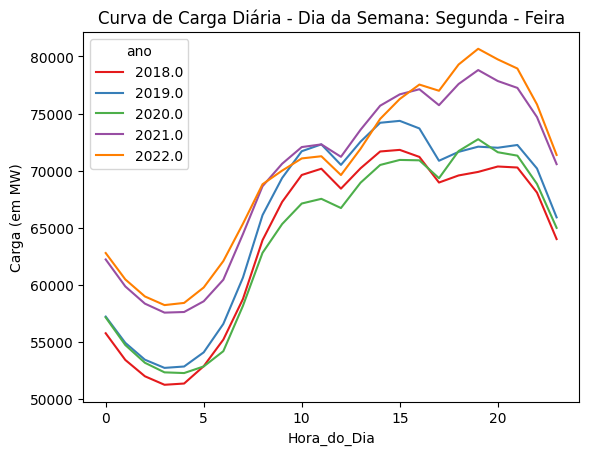

In [ ]:
# Elaborando Gráfico

# Fazendo o Gráfico
df_Mo = pd.concat([hourly_means_Mo_2018.assign(dataset='df1'), hourly_means_Mo_2019.assign(dataset='df2'), hourly_means_Mo_2020.assign(dataset='df3'), hourly_means_Mo_2021.assign(dataset='df4'), hourly_means_Mo_2022.assign(dataset='df5')], ignore_index=True)
sns.lineplot(data=df_Mo, x='din_instante', y='val_carga', hue='ano', palette='Set1')

# Inserindo rótulos dos eixos
plt.xlabel('Hora_do_Dia')
plt.ylabel('Carga (em MW)')
plt.title('Curva de Carga Diária - Dia da Semana: Segunda - Feira')

# Exibindo o Gráfico
plt.show()

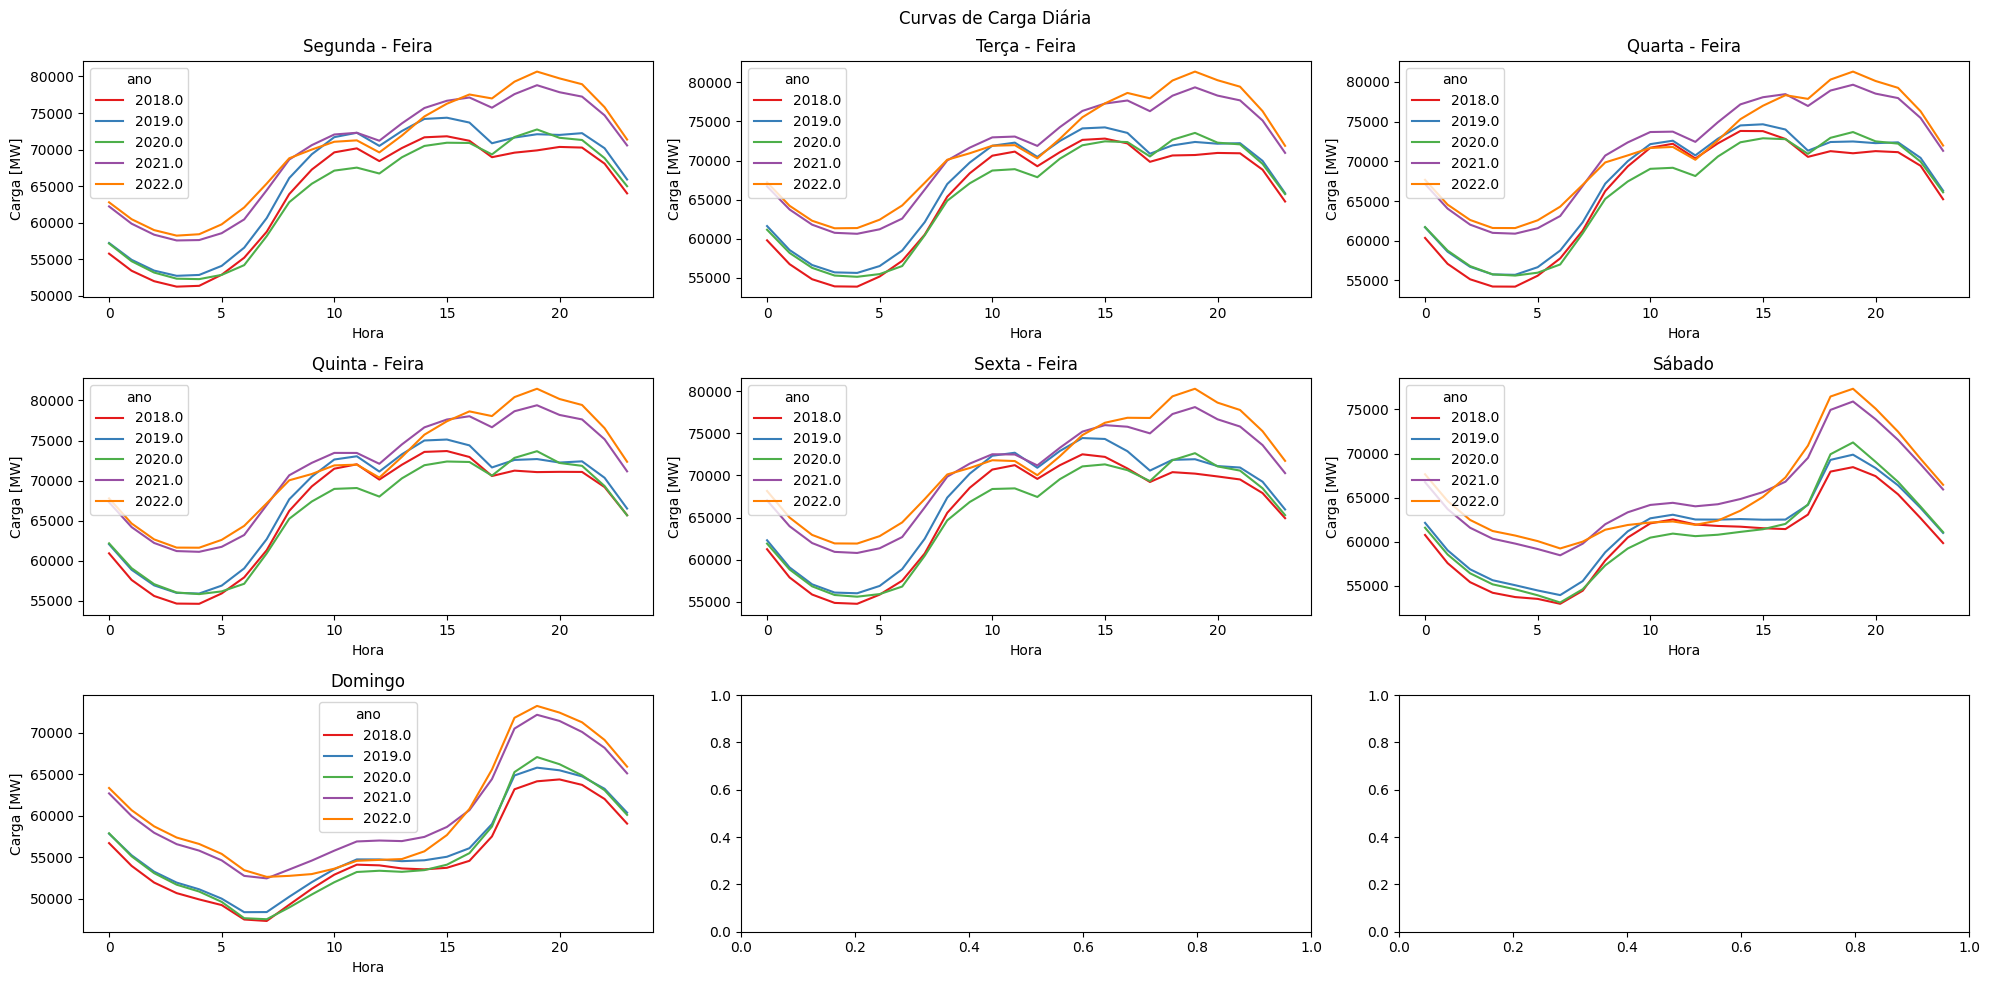

In [ ]:
# Elaborando Gráfico

# Carrega os sete datasets
df_Mo = pd.concat([hourly_means_Mo_2018.assign(dataset='df1'), hourly_means_Mo_2019.assign(dataset='df2'), hourly_means_Mo_2020.assign(dataset='df3'), hourly_means_Mo_2021.assign(dataset='df4'), hourly_means_Mo_2022.assign(dataset='df5')], ignore_index=True)
df_Tu = pd.concat([hourly_means_Tu_2018.assign(dataset='df1'), hourly_means_Tu_2019.assign(dataset='df2'), hourly_means_Tu_2020.assign(dataset='df3'), hourly_means_Tu_2021.assign(dataset='df4'), hourly_means_Tu_2022.assign(dataset='df5')], ignore_index=True)
df_Wd = pd.concat([hourly_means_Wd_2018.assign(dataset='df1'), hourly_means_Wd_2019.assign(dataset='df2'), hourly_means_Wd_2020.assign(dataset='df3'), hourly_means_Wd_2021.assign(dataset='df4'), hourly_means_Wd_2022.assign(dataset='df5')], ignore_index=True)
df_Th = pd.concat([hourly_means_Th_2018.assign(dataset='df1'), hourly_means_Th_2019.assign(dataset='df2'), hourly_means_Th_2020.assign(dataset='df3'), hourly_means_Th_2021.assign(dataset='df4'), hourly_means_Th_2022.assign(dataset='df5')], ignore_index=True)
df_Fr = pd.concat([hourly_means_Fr_2018.assign(dataset='df1'), hourly_means_Fr_2019.assign(dataset='df2'), hourly_means_Fr_2020.assign(dataset='df3'), hourly_means_Fr_2021.assign(dataset='df4'), hourly_means_Fr_2022.assign(dataset='df5')], ignore_index=True)
df_St = pd.concat([hourly_means_St_2018.assign(dataset='df1'), hourly_means_St_2019.assign(dataset='df2'), hourly_means_St_2020.assign(dataset='df3'), hourly_means_St_2021.assign(dataset='df4'), hourly_means_St_2022.assign(dataset='df5')], ignore_index=True)
df_Su = pd.concat([hourly_means_Su_2018.assign(dataset='df1'), hourly_means_Su_2019.assign(dataset='df2'), hourly_means_Su_2020.assign(dataset='df3'), hourly_means_Su_2021.assign(dataset='df4'), hourly_means_Su_2022.assign(dataset='df5')], ignore_index=True)

# Cria uma figura com sete subparcelas
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

# Plota os gráficos de linhas para cada dataset em sua respectiva subparcela
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_Mo, ax=axs[0,0])
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_Tu, ax=axs[0,1])
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_Wd, ax=axs[0,2])
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_Th, ax=axs[1,0])
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_Fr, ax=axs[1,1])
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_St, ax=axs[1,2])
sns.lineplot(x="din_instante", y="val_carga", hue='ano', palette='Set1', data=df_Su, ax=axs[2,0])

# Ajusta as legendas e títulos das subparcelas
axs[0,0].set(title="Segunda - Feira", xlabel="Hora", ylabel="Carga [MW]")
axs[0,1].set(title="Terça - Feira", xlabel="Hora", ylabel="Carga [MW]")
axs[0,2].set(title="Quarta - Feira", xlabel="Hora", ylabel="Carga [MW]")
axs[1,0].set(title="Quinta - Feira", xlabel="Hora", ylabel="Carga [MW]")
axs[1,1].set(title="Sexta - Feira", xlabel="Hora", ylabel="Carga [MW]")
axs[1,2].set(title="Sábado", xlabel="Hora", ylabel="Carga [MW]")
axs[2,0].set(title="Domingo", xlabel="Hora", ylabel="Carga [MW]")

# Adiciona um título geral para as subparcelas
fig.suptitle("Curvas de Carga Diária")

# Ajusta o layout da figura
fig.tight_layout()

# Exibe o gráfico
plt.show()

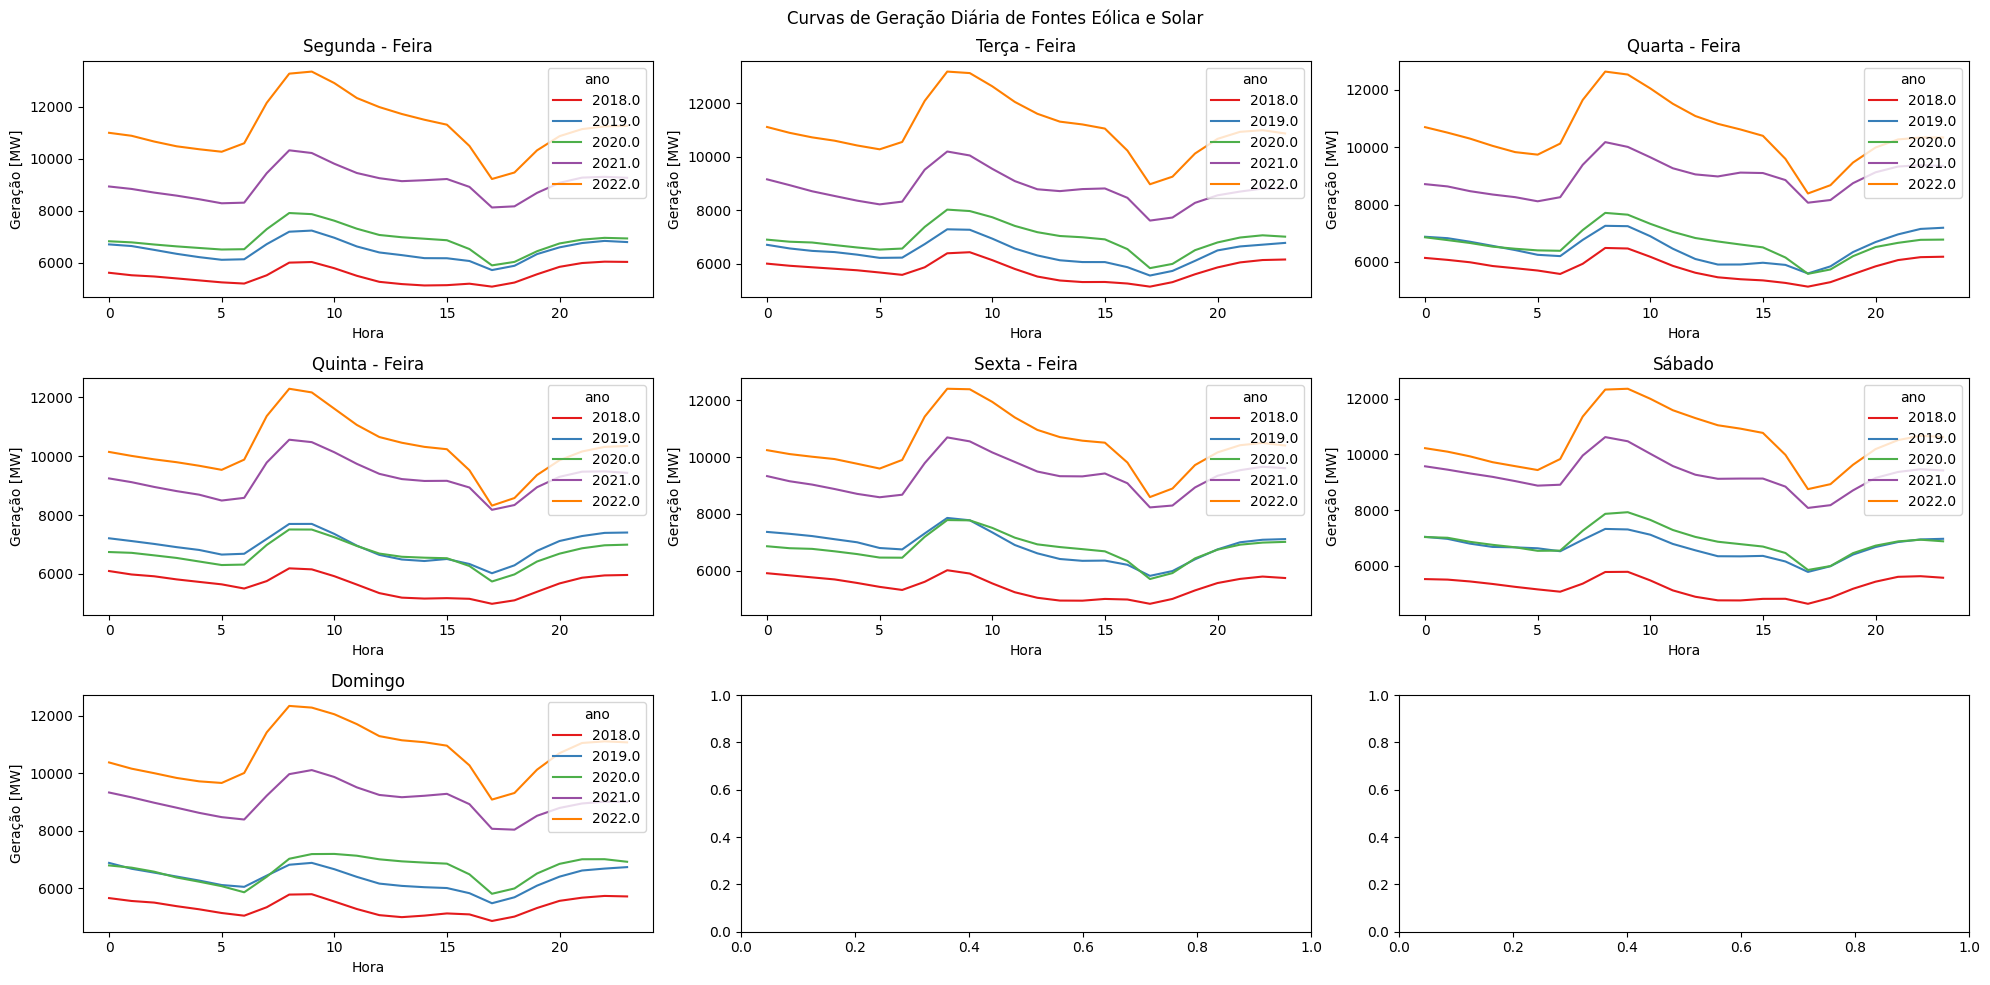

In [ ]:
# Elaborando Gráfico

# Carrega os sete datasets
df_Mo = pd.concat([hourly_means_Mo_2018.assign(dataset='df1'), hourly_means_Mo_2019.assign(dataset='df2'), hourly_means_Mo_2020.assign(dataset='df3'), hourly_means_Mo_2021.assign(dataset='df4'), hourly_means_Mo_2022.assign(dataset='df5')], ignore_index=True)
df_Tu = pd.concat([hourly_means_Tu_2018.assign(dataset='df1'), hourly_means_Tu_2019.assign(dataset='df2'), hourly_means_Tu_2020.assign(dataset='df3'), hourly_means_Tu_2021.assign(dataset='df4'), hourly_means_Tu_2022.assign(dataset='df5')], ignore_index=True)
df_Wd = pd.concat([hourly_means_Wd_2018.assign(dataset='df1'), hourly_means_Wd_2019.assign(dataset='df2'), hourly_means_Wd_2020.assign(dataset='df3'), hourly_means_Wd_2021.assign(dataset='df4'), hourly_means_Wd_2022.assign(dataset='df5')], ignore_index=True)
df_Th = pd.concat([hourly_means_Th_2018.assign(dataset='df1'), hourly_means_Th_2019.assign(dataset='df2'), hourly_means_Th_2020.assign(dataset='df3'), hourly_means_Th_2021.assign(dataset='df4'), hourly_means_Th_2022.assign(dataset='df5')], ignore_index=True)
df_Fr = pd.concat([hourly_means_Fr_2018.assign(dataset='df1'), hourly_means_Fr_2019.assign(dataset='df2'), hourly_means_Fr_2020.assign(dataset='df3'), hourly_means_Fr_2021.assign(dataset='df4'), hourly_means_Fr_2022.assign(dataset='df5')], ignore_index=True)
df_St = pd.concat([hourly_means_St_2018.assign(dataset='df1'), hourly_means_St_2019.assign(dataset='df2'), hourly_means_St_2020.assign(dataset='df3'), hourly_means_St_2021.assign(dataset='df4'), hourly_means_St_2022.assign(dataset='df5')], ignore_index=True)
df_Su = pd.concat([hourly_means_Su_2018.assign(dataset='df1'), hourly_means_Su_2019.assign(dataset='df2'), hourly_means_Su_2020.assign(dataset='df3'), hourly_means_Su_2021.assign(dataset='df4'), hourly_means_Su_2022.assign(dataset='df5')], ignore_index=True)

# Cria uma figura com sete subparcelas
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

# Plota os gráficos de linhas para cada dataset em sua respectiva subparcela
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_Mo, ax=axs[0,0])
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_Tu, ax=axs[0,1])
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_Wd, ax=axs[0,2])
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_Th, ax=axs[1,0])
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_Fr, ax=axs[1,1])
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_St, ax=axs[1,2])
sns.lineplot(x="din_instante", y="renovaveis", hue='ano', palette='Set1', data=df_Su, ax=axs[2,0])

# Ajusta as legendas e títulos das subparcelas
axs[0,0].set(title="Segunda - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[0,1].set(title="Terça - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[0,2].set(title="Quarta - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[1,0].set(title="Quinta - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[1,1].set(title="Sexta - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[1,2].set(title="Sábado", xlabel="Hora", ylabel="Geração [MW]")
axs[2,0].set(title="Domingo", xlabel="Hora", ylabel="Geração [MW]")

# Adiciona um título geral para as subparcelas
fig.suptitle("Curvas de Geração Diária de Fontes Eólica e Solar")

# Ajusta o layout da figura
fig.tight_layout()

# Exibe o gráfico
plt.show()

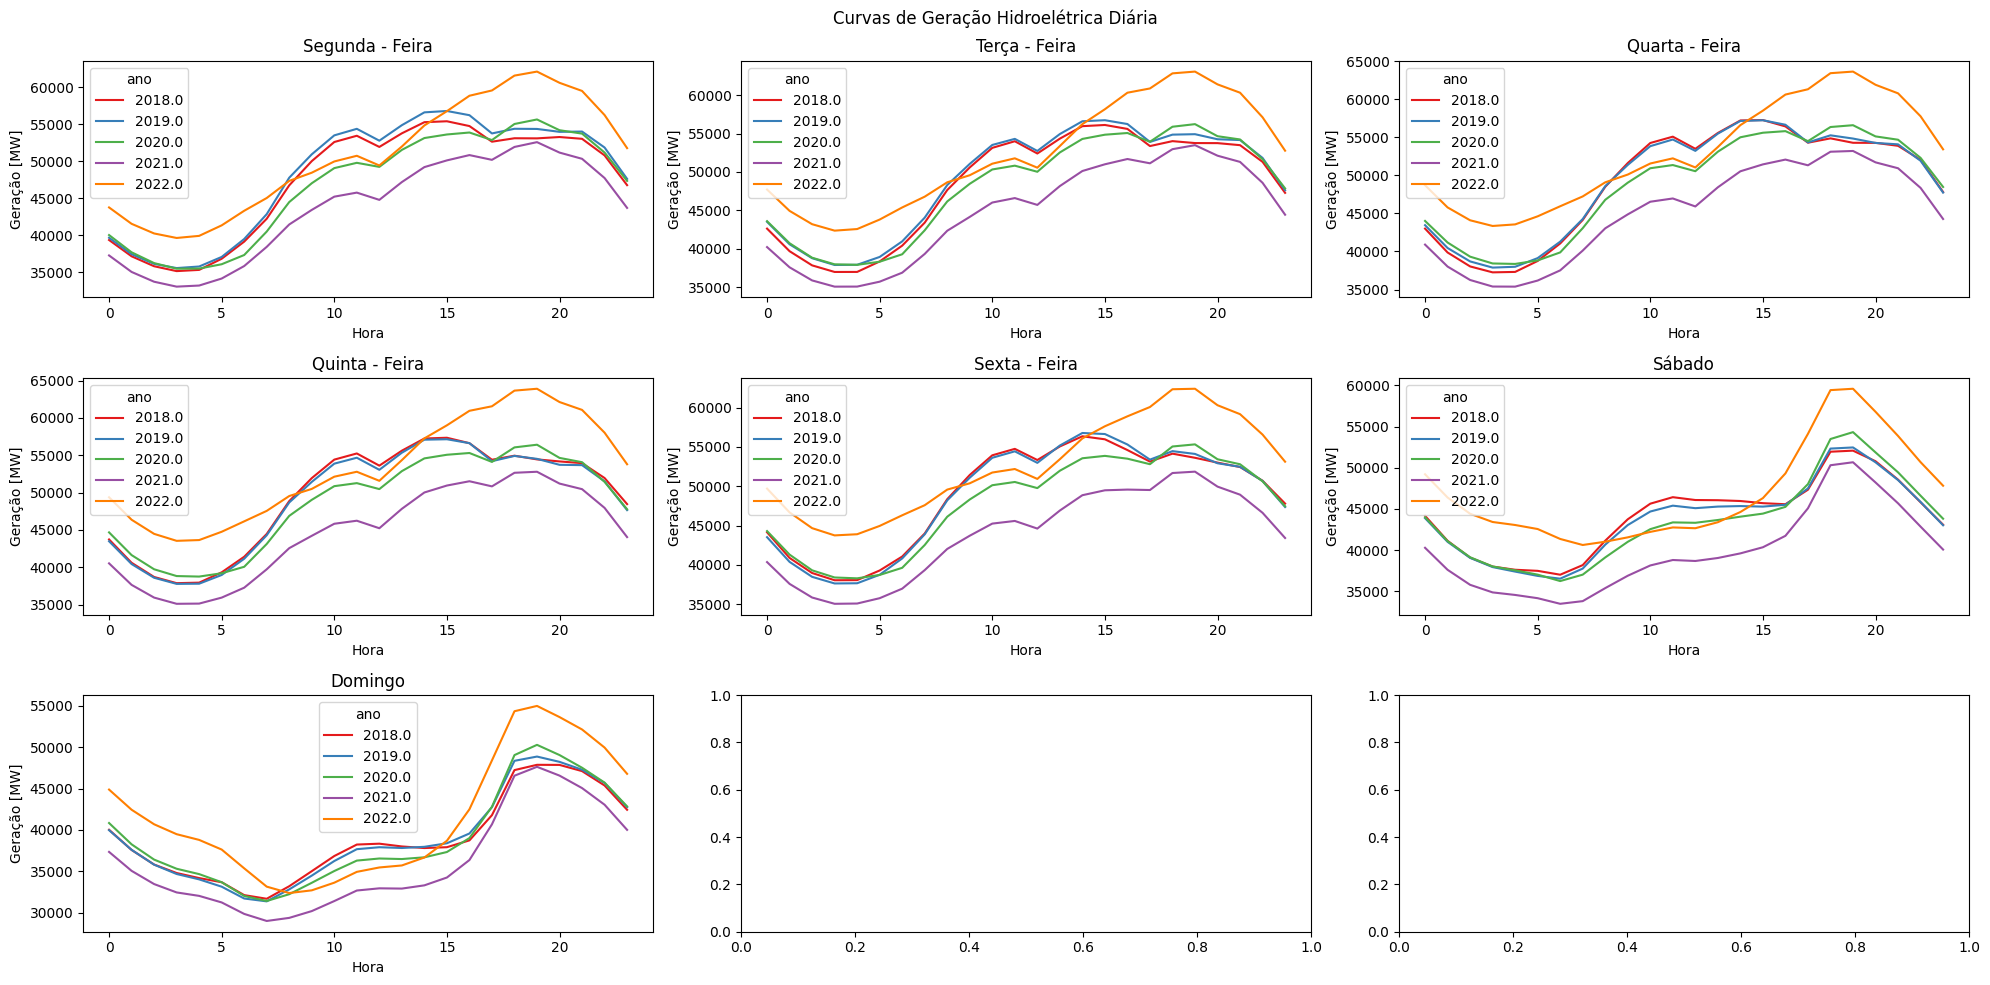

In [ ]:
# Elaborando Gráfico

# Carrega os sete datasets
df_Mo = pd.concat([hourly_means_Mo_2018.assign(dataset='df1'), hourly_means_Mo_2019.assign(dataset='df2'), hourly_means_Mo_2020.assign(dataset='df3'), hourly_means_Mo_2021.assign(dataset='df4'), hourly_means_Mo_2022.assign(dataset='df5')], ignore_index=True)
df_Tu = pd.concat([hourly_means_Tu_2018.assign(dataset='df1'), hourly_means_Tu_2019.assign(dataset='df2'), hourly_means_Tu_2020.assign(dataset='df3'), hourly_means_Tu_2021.assign(dataset='df4'), hourly_means_Tu_2022.assign(dataset='df5')], ignore_index=True)
df_Wd = pd.concat([hourly_means_Wd_2018.assign(dataset='df1'), hourly_means_Wd_2019.assign(dataset='df2'), hourly_means_Wd_2020.assign(dataset='df3'), hourly_means_Wd_2021.assign(dataset='df4'), hourly_means_Wd_2022.assign(dataset='df5')], ignore_index=True)
df_Th = pd.concat([hourly_means_Th_2018.assign(dataset='df1'), hourly_means_Th_2019.assign(dataset='df2'), hourly_means_Th_2020.assign(dataset='df3'), hourly_means_Th_2021.assign(dataset='df4'), hourly_means_Th_2022.assign(dataset='df5')], ignore_index=True)
df_Fr = pd.concat([hourly_means_Fr_2018.assign(dataset='df1'), hourly_means_Fr_2019.assign(dataset='df2'), hourly_means_Fr_2020.assign(dataset='df3'), hourly_means_Fr_2021.assign(dataset='df4'), hourly_means_Fr_2022.assign(dataset='df5')], ignore_index=True)
df_St = pd.concat([hourly_means_St_2018.assign(dataset='df1'), hourly_means_St_2019.assign(dataset='df2'), hourly_means_St_2020.assign(dataset='df3'), hourly_means_St_2021.assign(dataset='df4'), hourly_means_St_2022.assign(dataset='df5')], ignore_index=True)
df_Su = pd.concat([hourly_means_Su_2018.assign(dataset='df1'), hourly_means_Su_2019.assign(dataset='df2'), hourly_means_Su_2020.assign(dataset='df3'), hourly_means_Su_2021.assign(dataset='df4'), hourly_means_Su_2022.assign(dataset='df5')], ignore_index=True)

# Cria uma figura com sete subparcelas
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

# Plota os gráficos de linhas para cada dataset em sua respectiva subparcela
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_Mo, ax=axs[0,0])
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_Tu, ax=axs[0,1])
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_Wd, ax=axs[0,2])
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_Th, ax=axs[1,0])
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_Fr, ax=axs[1,1])
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_St, ax=axs[1,2])
sns.lineplot(x="din_instante", y="val_gerhidraulica", hue='ano', palette='Set1', data=df_Su, ax=axs[2,0])

# Ajusta as legendas e títulos das subparcelas
axs[0,0].set(title="Segunda - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[0,1].set(title="Terça - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[0,2].set(title="Quarta - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[1,0].set(title="Quinta - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[1,1].set(title="Sexta - Feira", xlabel="Hora", ylabel="Geração [MW]")
axs[1,2].set(title="Sábado", xlabel="Hora", ylabel="Geração [MW]")
axs[2,0].set(title="Domingo", xlabel="Hora", ylabel="Geração [MW]")

# Adiciona um título geral para as subparcelas
fig.suptitle("Curvas de Geração Hidroelétrica Diária")

# Ajusta o layout da figura
fig.tight_layout()

# Exibe o gráfico
plt.show()